## Global Terrorism Database

#### Data

URL: https://www.kaggle.com/datasets/START-UMD/gtd

#### Context

Information on more than 180,000 Terrorist Attacks

The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.

#### Content

Geography: Worldwide

Time period: 1970-2017, except 1993

Unit of analysis: Attack

Variables: >100 variables on location, tactics, perpetrators, targets, and outcomes

Sources: Unclassified media articles (Note: Please interpret changes over time with caution. Global patterns are driven by diverse trends in particular regions, and data collection is influenced by fluctuations in access to media coverage over both time and place.)

Definition of terrorism:

"The threatened or actual use of illegal force and violence by a non-state actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation."

See the GTD Codebook for important details on data collection methodology, definitions, and coding schema.

## Analysis

#### 목적 
- 테러의 심각성을 인지할 수 있는 시각화 자료를 제시하겠습니다.

- 테러가 급격하게 증가하는 시점이 있는데, 그 시점을 찾겠습니다.

- 테러가 급격하게 증가하는 시점을 찾았다면, 그 원인을 추측하고 적절한 근거를 제시하겠습니다.

#### 과정 
1. 전 세계에서 발생하고 있는 테러의 발생 추이를 확인하고, 전체적인 데이터의 흐름을 확인해 보겠습니다.

2. 다음으로 두 번째 목적에 해당하는 '테러가 급격하게 증가하는 시점'을 찾아보겠습니다.

3. 다음으로 세 번째 목적에 해당하는 '테러가 급격하게 증가하게 된 원인'을 추측해 보겠습니다.

4. 다음으로 '테러가 급격하게 증가하는 시점'을 옳게 찾았는지 확인해 보겠습니다.

5. 다음으로 '테러가 급격하게 증가하게 된 원인'을 옳게 추측했는지 확인해 보겠습니다.

6. 마지막으로 첫 번째 목적에 해당하는 '테러의 심각성을 인지할 수 있는 시각화 자료'를 제시하겠습니다.

#### 참고
- Analysis Tools: Python, Tableau

- Presentation: Keynote


#### 라이브러리 호출

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 데이터 불러오기

In [46]:
terrorism = pd.read_csv("./dataset/terrorism.csv", encoding="ISO-8859-1", low_memory=False)

#### 데이터 전처리

해당 데이터는 전체 컬럼의 수가 135개이고, 181,691개가 있습니다. 

그러므로 원활한 데이터 분석을 위해서 목적에 알맞은 컬럼을 선택해야 하고, 이를 추출해야 했습니다.

1. 전체적인 데이터의 흐름을 살펴보아야 하므로 '년, 월, 일'에 해당하는 데이터를 선택했습니다.

2. 다음으로 전 세계적으로 테러가 골고루 발생하고 있는지, 특정 국가에 테러가 집중되어 있는지 확인해야 하므로 '국가'에 해당하는 데이터를 선택했습니다.

3. 다음으로 전 세계적으로 발생하고 있는 테러의 사망자 수, 피해자 수 등의 피해를 분석해야 하므로 '사망자, 부상자'에 해당하는 데이터를 선택했습니다.

- 추가적으로 두 컬럼을 합한 '사상자' 컬럼을 추가했습니다.

4. 그 밖으로 확인해 본 컬럼, '공격의 타입, 타겟의 타입, 무기의 타입, 피해자의 국적'에 해당하는 데이터를 선택했습니다.

- 공격의 타입을 확인한 이유는 '특정 국가는 테러 발생 수 대비 사상자가 많이 발생하는 점'을 찾았고, 공격의 타입에서 차이점이 있으리라 생각했습니다.

- 타겟의 타입을 확인한 이유는 '테러는 테러리스트의 의도를 갖는 행동'이라고 생각했고, 그 의도는 타겟의 타입으로부터 찾을 수 있으리라 생각했습니다.

- 무기의 타입을 확인한 이유는 '공격의 타입 중에서도 특별히 유의해서 살펴보아야 할 데이터'가 있을 수도 있다고 생각했습니다.

- 피해자의 국적을 확인한 이유는 '테러는 테러리스트의 의도를 갖는 행동'이라고 생각했고, 그 의도는 타겟의 국적으로부터 찾을 수 있으리라 생각했습니다.

In [47]:
terrorism.rename(
    columns={"iyear":"Year",
             "imonth":"Month",
             "iday":"Day",
             "country_txt":"Country",
             "attacktype1_txt":"AttackType",
             "nkill":"Killed",
             "nwound":"Wounded",
             "targtype1_txt":"Target_type",
             "weaptype1_txt":"Weapon_type",
             "natlty1_txt":"Nationality"},inplace=True)
terrorism["Casualities"] = terrorism["Killed"] + terrorism["Wounded"]
terrorism = terrorism[["Year", "Month", "Day", "Country", "AttackType", "Killed", "Wounded", "Casualities", "Target_type", "Weapon_type", "Nationality"]]

#### 전체 기간 동안의 테러 발생 수

전체 기간 동안의 테러 발생 수를 연도 단위로 표현한 차트입니다.

전체적인 데이터를 차례대로 살펴보겠습니다.

- 1992년, 이 시점을 기점으로 테러 발생은 완만하게 감소하고 있습니다.

- 2004년, 이 시점을 기점으로 테러 발생은 다시 완만하게 증가하고 있습니다.

- 그래서 두 번째 목적에 해당하는 '테러가 급격하게 증가하는 시점'을 '2004년'으로 선택하였습니다.

- 그리고 세 번째 목적에 해당하는 '테러가 급격하게 증가하게 된 원인'을 '테러와의 전쟁'으로 추측했습니다.

- '테러와의 전쟁'을 '테러가 급격하게 증가하게 된 원인'으로 추측한 이유는 다음과 같습니다.

- 역사상 가장 사망자가 많은 테러, 즉 2001년 09월 11일에 발생한 사건으로 인해 미국은 테러리스트를 대상으로 '테러와의 전쟁'을 선언하였습니다.

- 그 내용은 미국이 알카에다를 해체하고, 탈레반 정권을 축출해 아프가니스탄에서 알카에다의 안전한 작전 기지를 제거하겠다는 내용입니다.

- 이 선언문을 바탕으로 미국은 그 해에 아프가니스탄 내 테러리스트를 축출하기 위해 군대를 파견하였습니다.

- 그리고 그 과정에서 강압적인 군사 행동에 맞서 싸우는 테러리스트의 거센 반발, 그리고 테러리스트의 반발이 있었으리라 예상하였기 때문입니다.

#### Tableau

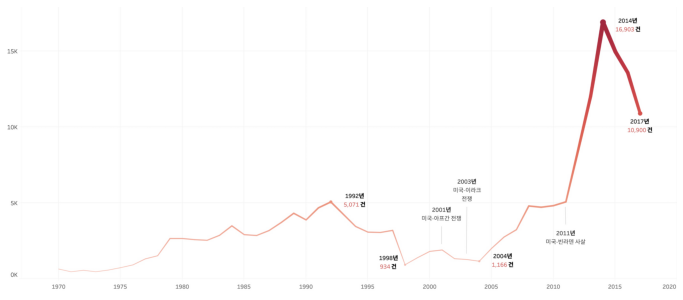

In [48]:
plt.figure(figsize=(12,6))
picture01 = plt.imread("./dataset/picture01.jpg")
plt.imshow(picture01)
plt.axis("Off")
plt.show()

#### Python

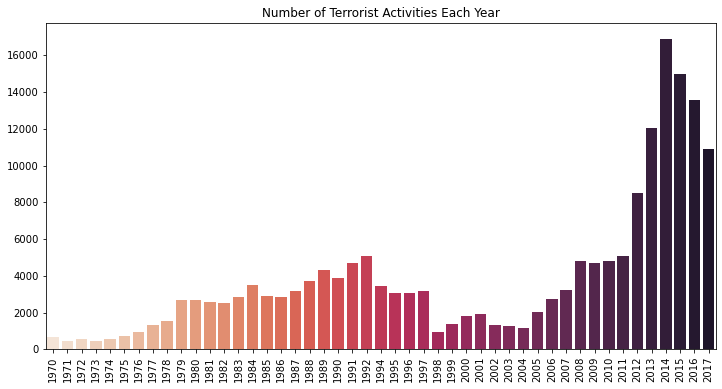

In [49]:
palette = sns.color_palette("rocket", n_colors=50)
palette.reverse()

plt.subplots(figsize=(12,6))
sns.countplot(data=terrorism, x="Year", palette=palette)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("")
plt.title('Number of Terrorist Activities Each Year')
plt.show()

#### 전체 기간 동안의 국가 별 테러 발생 수: 상위 10개 국가

전체 기간 동안의 국가 별 테러 발생 수 상위 10개 국가를 표현한 차트입니다.

전체적인 데이터를 차례대로 살펴보겠습니다.

- 테러 발생이 가장 많은 국가는 이라크, 파키스탄, 아프가니스탄, 인도, 콜롬비아 등이 있습니다.

- '테러와의 전쟁'으로 교전 국가가 된 국가는 '아프가니스탄'입니다.

- '이라크'도 '테러와의 전쟁'으로 교전 국가가 되었습니다.

- 2003년, 미국은 아프가니스탄에 이어 이라크 역시 군대를 파견하였습니다.

- 그 이유는 이라크의 독재자, 사담 후세인 정권이 빈라덴의 알카에다를 원조하고 있다는 이유였습니다.

- 그리고 미국이 사담 후세인 정권을 축출하는 과정에서 이라크 내 종파, 수니파, 그리고 시아파 등이 정권을 두고 치열한 격전이 있었습니다.

- '파키스탄'도 예외는 아니었습니다.

- '파키스탄'은 지리적으로 '아프가니스탄'과 국경이 맞닿아 있습니다.

- 그리고 미국은 '파키스탄'에 주둔하고 있는 '아프가니스탄' 테러리스트를 제거하기 위해 국경을 넘어 공격을 감행한 사례가 있습니다.

- 이들 국가를 설명할 수 있는 공통적인 키워드는 '미국', '테러'이므로 '테러와의 전쟁'이 어느 정도 가능성이 있는 가정이라고 생각했습니다.

#### Python

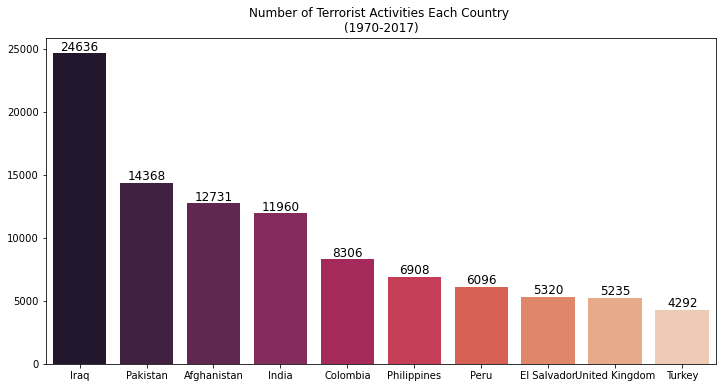

In [50]:
palette = sns.color_palette("rocket", n_colors=10)

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=terrorism.Country.value_counts()[:10].index, y=terrorism.Country.value_counts()[:10].values, palette=palette, ax=ax)
ax.bar_label(ax.containers[-1], fmt="%.0f", label_type="edge", fontsize=12, )
plt.xlabel("")
plt.ylabel("")
plt.title('Number of Terrorist Activities Each Country \n(1970-2017)')
plt.show()

#### 두 번째 목적, 테러가 급격하게 증가하는 시점을 옳게 선정했을까? 

세 번째 목적, 테러가 급격하게 증가하게 된 원인의 가정을 어느 정도 확인해 보았기 때문에 두 번째 목적도 확인해 보고자 했습니다.

그러므로 테러가 급격하게 증가하는 시점, 2004년을 기점으로 데이터를 나누어서 확인해 보겠습니다.

In [51]:
# 2004년 이후의 테러 발생 데이터

terrorism_over = terrorism[terrorism.Year >= 2004]

In [52]:
# 2004년 이전의 테러 발생 데이터

terrorism_under = terrorism[terrorism.Year < 2004]

#### Python

첫 번째로 확인해 본 데이터는 '2004년 이전, 테러 발생 상위 국가'를 확인해 보았습니다.

- 데이터를 확인해 본 결과, 전체 기간 동안 가장 많은 테러가 발생한 국가 '이라크', '아프가니스탄', '파키스탄' 등의 국가는 보이지 않습니다.

- 즉, '이라크', '아프가니스탄', '파키스탄'에서 발생한 테러는 '2004년 이후'에 발생하였고, 그 발생 빈도 역시 급격하게 증가하였다는 사실을 알 수 있었습니다. 

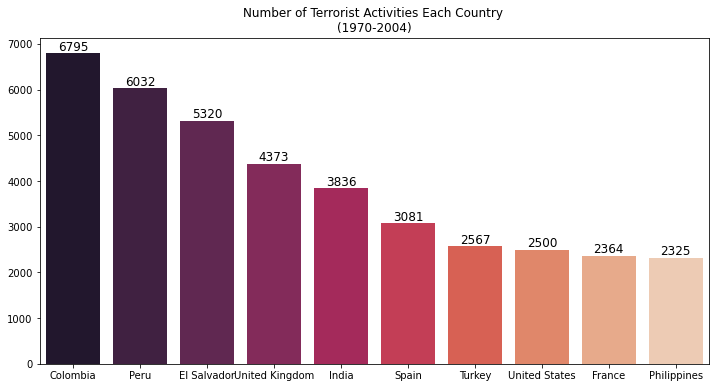

In [53]:
palette = sns.color_palette("rocket", n_colors=10)

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=terrorism_under.Country.value_counts()[:10].index, y=terrorism_under.Country.value_counts()[:10].values, palette=palette, ax=ax)
ax.bar_label(ax.containers[-1], fmt="%.0f", label_type="edge", fontsize=12, )
plt.xlabel("")
plt.ylabel("")
plt.title('Number of Terrorist Activities Each Country \n(1970-2004)')
plt.show()

#### Python

두 번째로 확인해 본 데이터는 '2004년 이후, 테러 발생 상위 국가'를 확인해 보았습니다.

- 데이터를 확인해 본 결과, 전체 기간 동안 가장 많은 테러가 발생한 국가 '이라크', '아프가니스탄', '파키스탄' 순으로 나열되어 있습니다.

- '2004년 이전, 테러 발생 최상위 국가'에 해당하는 '콜롬비아', '페루', '엘 살바도르' 등의 국가는 보이지 않습니다.

- '인도'는 테러가 어느 시점을 기점으로 급격하게 증가한 것이 아니고, 이전부터 현재까지 지속적으로 발생하고 있는 국가로 여겨집니다.

분석의 목적은 '급격하게 증가하는 시점', '급격하게 증가하게 된 원인'을 찾아내는 것이므로 '2004년'을 기점으로 테러가 급격하게 증가한 국가를 중심으로 살펴보겠습니다.

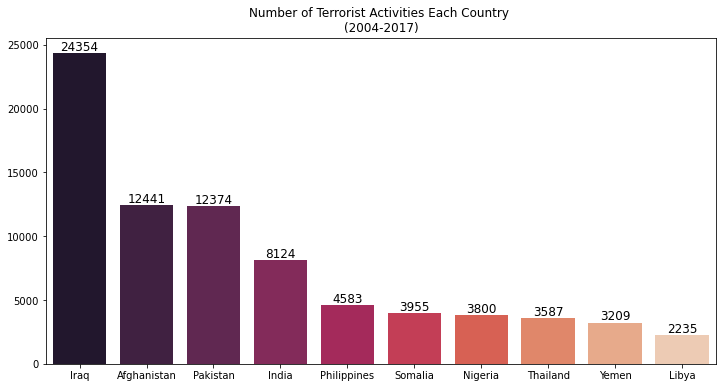

In [54]:
palette = sns.color_palette("rocket", n_colors=10)

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=terrorism_over.Country.value_counts()[:10].index, y=terrorism_over.Country.value_counts()[:10].values, palette=palette, ax=ax)
ax.bar_label(ax.containers[-1], fmt="%.0f", label_type="edge", fontsize=12, )
plt.xlabel("")
plt.ylabel("")
plt.title('Number of Terrorist Activities Each Country \n(2004-2017)')
plt.show()

#### Tableau

'이라크', '아프가니스탄', '파키스탄'이 특정 시점을 기점으로 급격하게 증가하였다는 사실은 확인했습니다. 그러나 정확히 어느 시점부터 증가하기 시작했는지 다시 한번 자세하게 확인해 보았습니다.

테러 발생 상위 국가 중 '이라크', '아프가니스탄', '파키스탄'은 붉은색으로 표시하였고, 나머지 일곱 개 국가를 회색으로 표현해서 어느 시점부터 교차하기 시작했는지 확인해 보았습니다.

이를 확인해 본 결과, 그 시점은 명확하지 않지만 2000년대 초반부터 증가하기 시작했다는 사실을 알 수 있습니다.

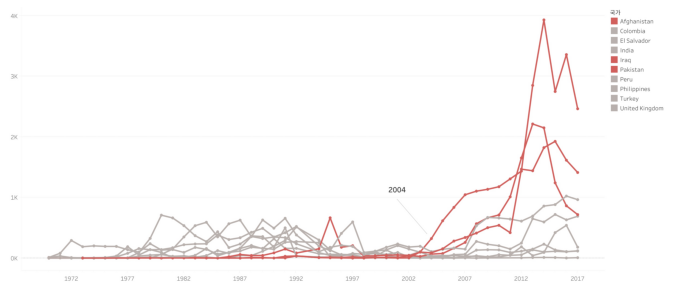

In [55]:
plt.figure(figsize=(12,6))
picture02 = plt.imread("./dataset/picture02.jpg")
plt.imshow(picture02)
plt.axis("Off")
plt.show()

#### Python

#### 전체 기간 동안의 이라크 국가 내 테러 발생 수

이라크는 이라크 전쟁이 시작된 시점을 기점으로 테러가 증가하기 시작했습니다.

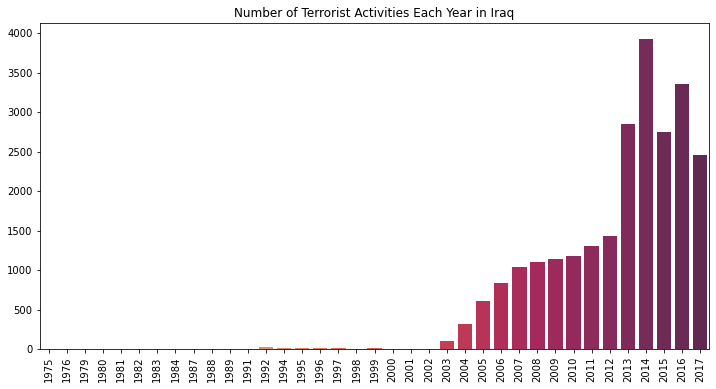

In [56]:
iraq = terrorism[terrorism["Country"] == "Iraq"]

palette = sns.color_palette("rocket", n_colors=50)
palette.reverse()

plt.subplots(figsize=(12,6))
sns.countplot(data=iraq, x="Year", palette=palette)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("")
plt.title('Number of Terrorist Activities Each Year in Iraq')
plt.show()

#### 전체 기간 동안의 아프간 국가 내 테러 발생 수

아프가니스탄은 아프가니스탄 전쟁이 시작된 시점을 기점으로 테러가 증가하기 시작했습니다.


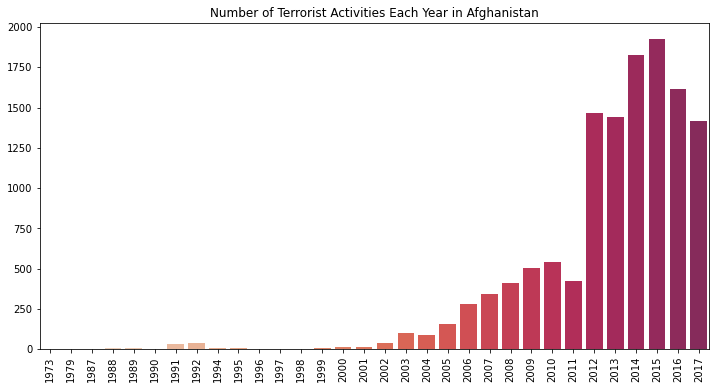

In [57]:
afghan = terrorism[terrorism["Country"] == "Afghanistan"]

palette = sns.color_palette("rocket", n_colors=50)
palette.reverse()

plt.subplots(figsize=(12,6))
sns.countplot(data=afghan, x="Year", palette=palette)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("")
plt.title('Number of Terrorist Activities Each Year in Afghanistan')
plt.show()

#### 전체 기간 동안의 파키스탄 국가 내 테러 발생 수

파키스탄은 아프가니스탄 전쟁이 진행되고 있고, 그 전쟁이 격렬해질 무렵 테러가 증가하기 시작했습니다.

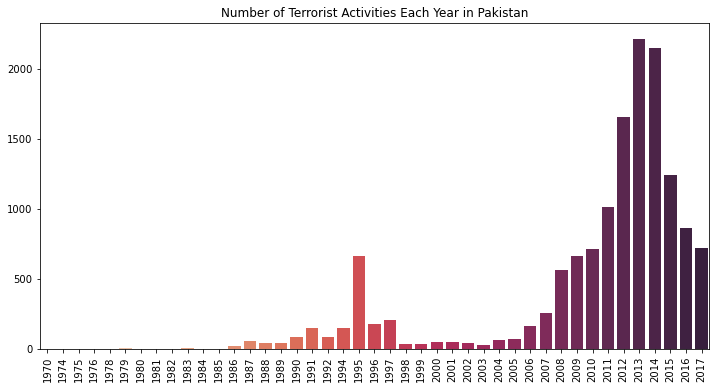

In [58]:
pakistan = terrorism[terrorism["Country"] == "Pakistan"]

palette = sns.color_palette("rocket", n_colors=50)
palette.reverse()

plt.subplots(figsize=(12,6))
sns.countplot(data=pakistan, x="Year", palette=palette)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("")
plt.title('Number of Terrorist Activities Each Year in Pakistan')
plt.show()

#### 전체 기간 동안의 국가 별 테러 발생 상위 10개 국가: 테러 발생 수, 사망자, 부상자, 사상자

전체 기간 동안의 국가 별 테러 발생 상위 10개 국가의 테러 발생 수, 사망자, 부상자, 그리고 사상자를 표현한 차트입니다.

전체적인 데이터를 차례대로 살펴보겠습니다.

- 이라크, 파키스탄, 아프가니스탄, 그리고 인도는 테러 발생 수 대비 사상자가 상당히 높은 모습을 보입니다.

- 네 개의 국가의 차트는 그 모양이 가파른 사선으로 형성되어 있는 반면, 그 밖의 국가는 완만한 사선, 혹은 수평에 가까운 모양으로 형성되어 있습니다.

- 그러므로 이라크, 파키스탄, 아프가니스탄, 인도는 살상력이 뛰어난 테러 공격이 자주 발생하고 있다는 사실을 예상할 수 있습니다.

#### Python

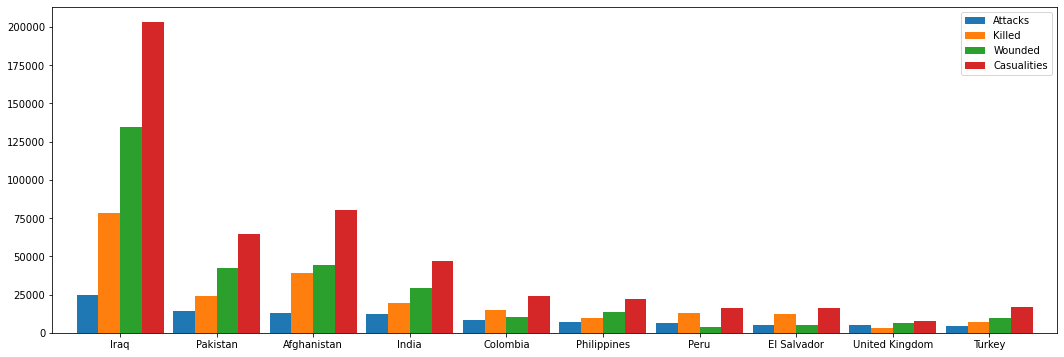

In [59]:
charts = terrorism['Country'].value_counts()[:10].to_frame()
charts.columns = ["Attacks"]
kill = terrorism.groupby("Country")["Killed"].sum().to_frame()
wound = terrorism.groupby("Country")["Wounded"].sum().to_frame()
casualities = terrorism.groupby("Country")["Casualities"].sum().to_frame()
charts = charts.merge(kill,left_index=True,right_index=True,how='left')
charts = charts.merge(wound,left_index=True,right_index=True,how='left')
charts = charts.merge(casualities,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.xticks(rotation=0)
plt.show()

#### 전체 기간 동안 발생한 테러 공격의 타입 별 사상자 수: 이라크

* 아래의 차트로 이전 차트에서 언급하였던 살상력이 뛰어난 테러 공격은 '폭탄물을 이용한 테러 공격'이 그것이었고, 폭발물을 이용한 테러 공격이 주된 공격의 형태라는 사실을 알 수 있습니다.

#### Python

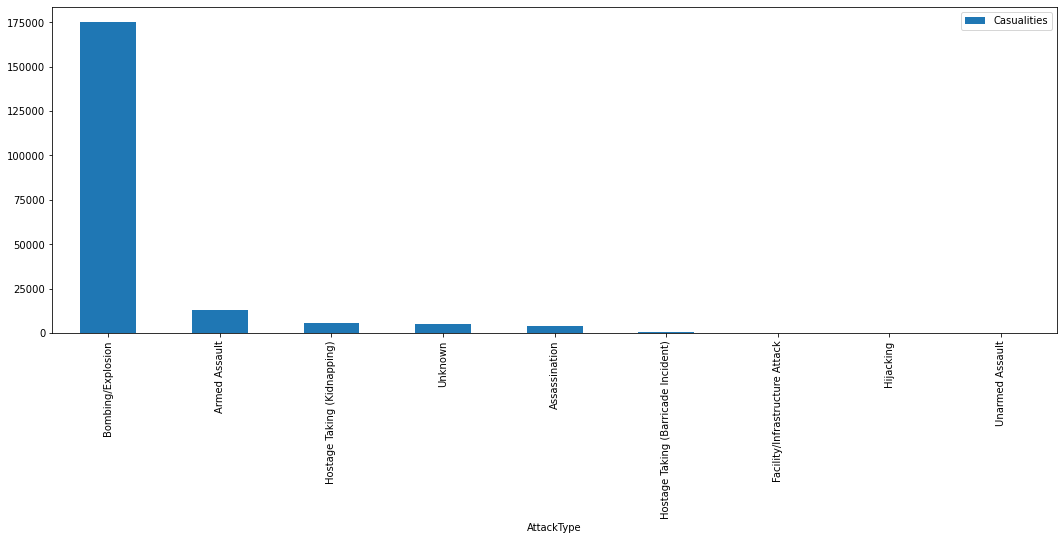

In [60]:
iraq = terrorism[terrorism["Country"] == "Iraq"]

iraq[["AttackType", "Casualities"]].groupby(iraq["AttackType"]).sum().sort_values(by="Casualities", ascending=False).astype(int).plot.bar()
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.xticks(rotation=90)
plt.show()

#### 전체 기간 동안 발생한 테러 공격으로 희생된 희생자의 타입 별 사상자 수: 이라크 (민간인 제외)

* 아래의 차트는 전체 기간 동안 발생한 테러 공격으로 희생된 희생자의 타입 별 사상자 수를 나타낸 차트입니다.

* 민간인을 제외한 이유는 테러 공격의 목표가 민간인이 아닌 다른 대상이라면 그 대상의 인근에 있던 민간인의 희생은 반드시 발생합니다.

* 그러므로 테러리스트의 테러 공격의 목표와 의도를 명확히 확인하기 위해 민간인을 제외하였습니다.

#### Python

* 이라크 국가 내에서 테러로 희생된 희생자의 타입은 민간인을 제외하고, 테러 공격으로 인한 희생자는 경찰, 군인, 사업가 등이 주를 이루고 있습니다.

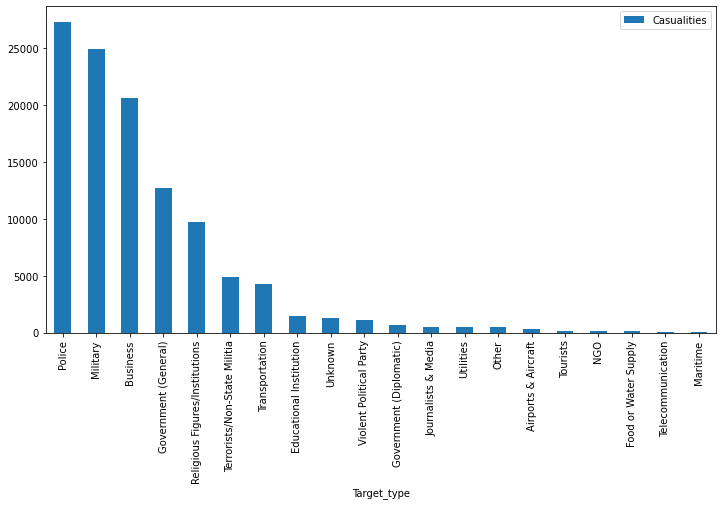

In [61]:
iraq[["Target_type", "Casualities"]].groupby(iraq["Target_type"]).sum().sort_values(by="Casualities", ascending=False)[1:].astype(int).plot.bar()
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.xticks(rotation=90)
plt.show()

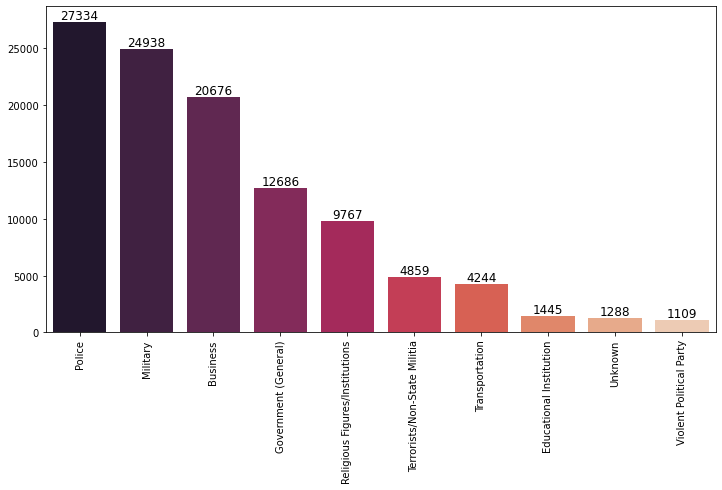

In [62]:
iraq_tar_type = terrorism[terrorism["Country"] == "Iraq"]
iraq_tar_type = iraq_tar_type[iraq_tar_type["Target_type"] != "Private Citizens & Property"]
palette = sns.color_palette("rocket", n_colors=10)

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=iraq_tar_type[["Target_type", "Casualities"]].groupby(terrorism["Target_type"]).sum().sort_values(by="Casualities", ascending=False)[:10].squeeze().index, 
            y=iraq_tar_type[["Target_type", "Casualities"]].groupby(terrorism["Target_type"]).sum().sort_values(by="Casualities", ascending=False)[:10].squeeze().values, palette=palette, ax=ax)
ax.bar_label(ax.containers[-1], fmt="%.0f", label_type="edge", fontsize=12)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("")
plt.title('')
plt.show()

#### 전체 기간 동안 발생한 폭탄 테러 공격의 타입 별 발생 수: 이라크

* 아래의 차트는 폭발물을 이용한 테러 공격의 구체적인 형태가 나타내고 있습니다.

#### Tableau

* 이라크 국가 내 폭탄 테러 공격의 형태는 차량 폭탄 테러, 자살 폭탄 테러 등이 가장 빈도가 많습니다.

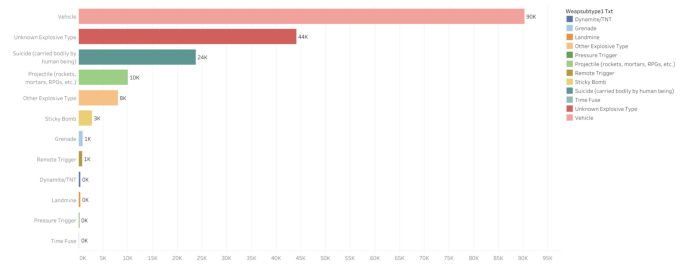

In [63]:
plt.figure(figsize=(12,6))
picture03 = plt.imread("./dataset/picture03.jpg")
plt.imshow(picture03)
plt.axis("Off")
plt.show()

#### 전체 기간 동안 발생한 테러 공격의 타입 별 사상자 수: 아프간

* 아래의 차트로 이전 차트에서 언급하였던 살상력이 뛰어난 테러 공격은 '폭탄물을 이용한 테러 공격'이 그것이었고, 폭발물을 이용한 테러 공격이 주된 공격의 형태라는 사실을 알 수 있습니다.

#### Python

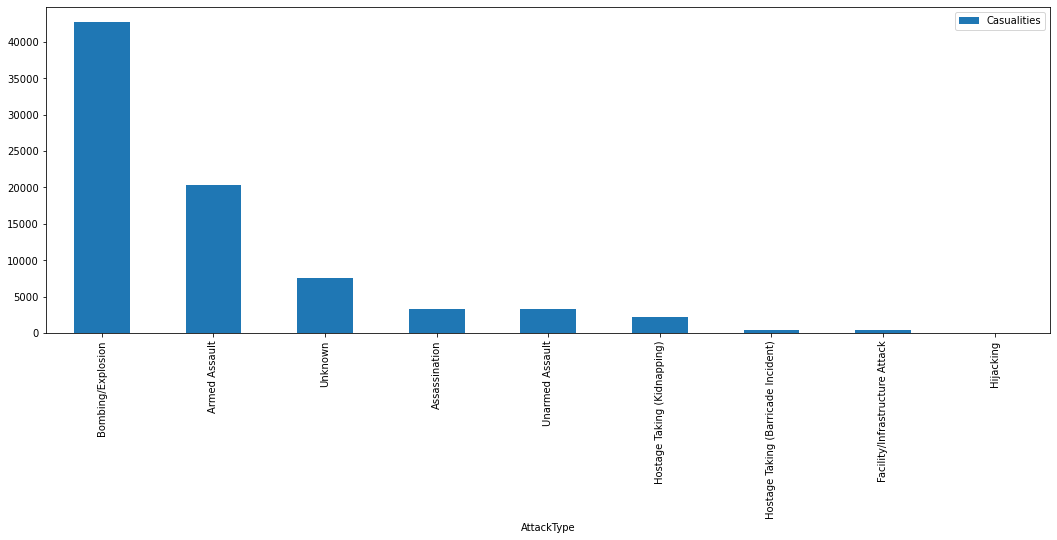

In [64]:
afghan = terrorism[terrorism["Country"] == "Afghanistan"]

afghan[["AttackType", "Casualities"]].groupby(afghan["AttackType"]).sum().sort_values(by="Casualities", ascending=False).astype(int).plot.bar()
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.xticks(rotation=90)
plt.show()

#### 전체 기간 동안 발생한 테러 공격으로 희생된 희생자의 타입 별 사상자 수: 아프가니스탄 (민간인 제외)

* 아래의 차트는 전체 기간 동안 발생한 테러 공격의 목표 타입 별 사상자 수를 나타낸 차트입니다.

* 민간인을 제외한 이유는 테러 공격의 목표가 민간인이 아닌 다른 대상이라면 그 대상의 인근에 있던 민간인의 희생은 반드시 발생합니다.

* 그러므로 테러리스트의 테러 공격의 목표와 의도를 명확히 확인하기 위해 민간인을 제외하였습니다.

#### Python

* 아프가니스탄 국가 내에서 테러로 희생된 희생자의 타입은 민간인을 제외하고, 경찰, 군인, 정부 인사 등이 주를 이루고 있습니다.

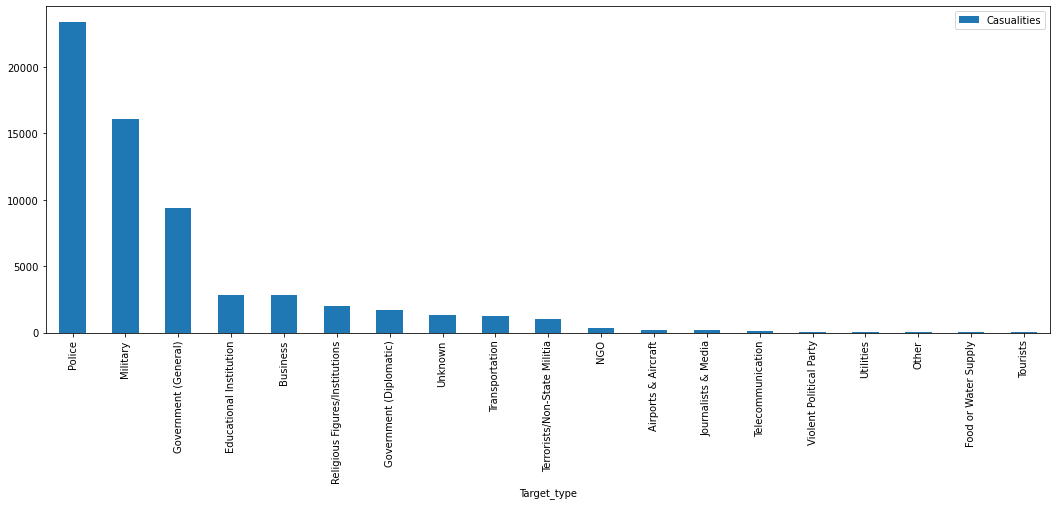

In [65]:
afghan = afghan[afghan["Target_type"] != "Private Citizens & Property"]
afghan[["Target_type", "Casualities"]].groupby(afghan["Target_type"]).sum().sort_values(by="Casualities", ascending=False)[:].astype(int).plot.bar()
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.xticks(rotation=90)
plt.show()

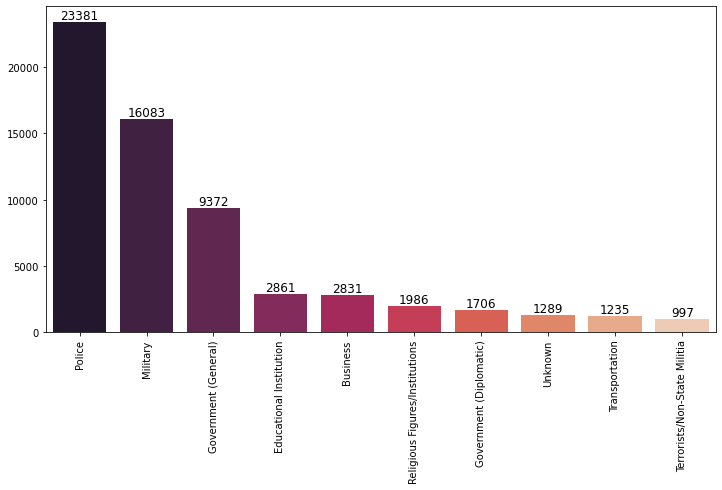

In [66]:
afghan_tar_type = terrorism[terrorism["Country"] == "Afghanistan"]
afghan_tar_type = afghan_tar_type[afghan_tar_type["Target_type"] != "Private Citizens & Property"]
palette = sns.color_palette("rocket", n_colors=10)

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=afghan_tar_type[["Target_type", "Casualities"]].groupby(terrorism["Target_type"]).sum().sort_values(by="Casualities", ascending=False)[:10].squeeze().index, 
            y=afghan_tar_type[["Target_type", "Casualities"]].groupby(terrorism["Target_type"]).sum().sort_values(by="Casualities", ascending=False)[:10].squeeze().values, palette=palette, ax=ax)
ax.bar_label(ax.containers[-1], fmt="%.0f", label_type="edge", fontsize=12)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("")
plt.title('')
plt.show()

#### 전체 기간 동안 발생한 폭탄 테러 공격의 타입 별 발생 수: 아프간

* 아래의 차트는 폭발물을 이용한 테러 공격의 구체적인 형태가 나타내고 있습니다.

#### Tableau

* 아프간 국가 내 폭탄 테러 공격의 형태는 차량 폭탄 테러, 자살 폭탄 테러 등이 가장 빈도가 많습니다.

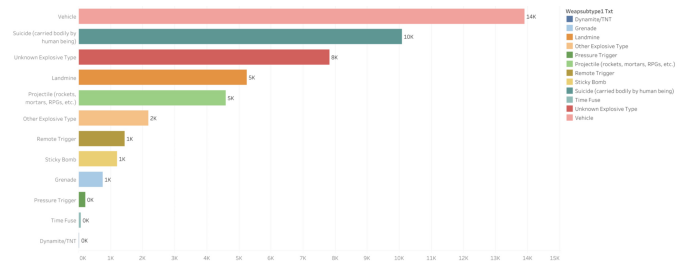

In [67]:
plt.figure(figsize=(12,6))
picture04 = plt.imread("./dataset/picture04.jpg")
plt.imshow(picture04)
plt.axis("Off")
plt.show()

#### 전체 기간 동안 발생한 테러 공격의 타입 별 사상자 수: 파키스탄

* 아래의 차트로 이전 차트에서 언급하였던 살상력이 뛰어난 테러 공격은 '폭탄물을 이용한 테러 공격'이 그것이었고, 폭발물을 이용한 테러 공격이 주된 공격의 형태라는 사실을 알 수 있습니다.

#### Python

In [68]:
pakistan = terrorism[terrorism["Country"] == "Pakistan"]

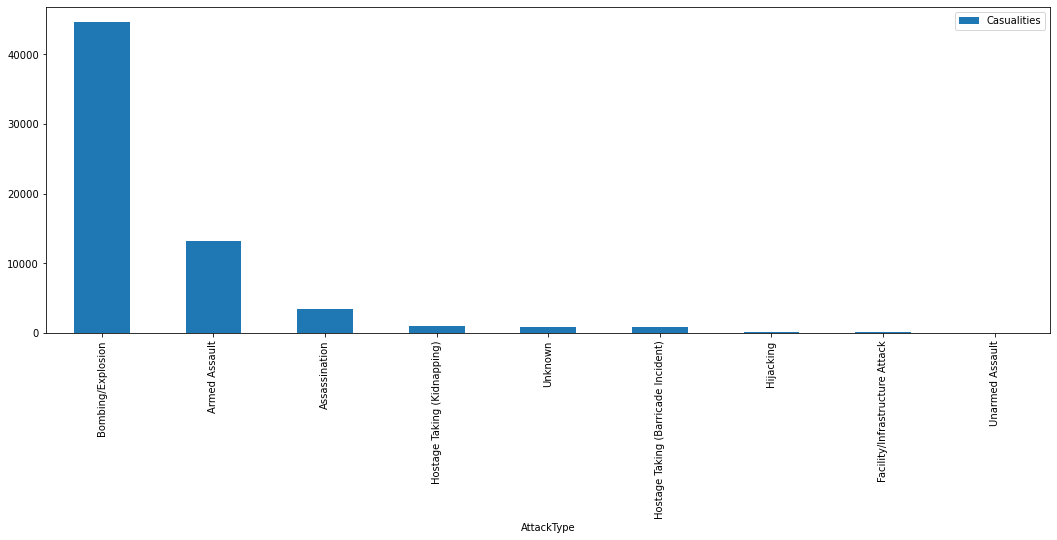

In [69]:
pakistan[["AttackType", "Casualities"]].groupby(pakistan["AttackType"]).sum().sort_values(by="Casualities", ascending=False).astype(int).plot.bar()
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.xticks(rotation=90)
plt.show()

#### 전체 기간 동안 발생한 테러 공격으로 희생된 희생자의 타입 별 사상자 수: 파키스탄 (민간인 제외)

* 아래의 차트는 전체 기간 동안 발생한 테러 공격의 목표 타입 별 사상자 수를 나타낸 차트입니다.

* 민간인을 제외한 이유는 테러 공격의 목표가 민간인이 아닌 다른 대상이라면 그 대상의 인근에 있던 민간인의 희생은 반드시 발생합니다.

* 그러므로 테러리스트의 테러 공격의 목표와 의도를 명확히 확인하기 위해 민간인을 제외하였습니다.

#### Python

* 파키스탄 국가 내에서 테러로 희생된 희생자의 타입은 민간인을 제외하고, 군인, 경찰, 그리고 종교 분쟁으로 인한 희생자 등이 주를 이루고 있습니다.

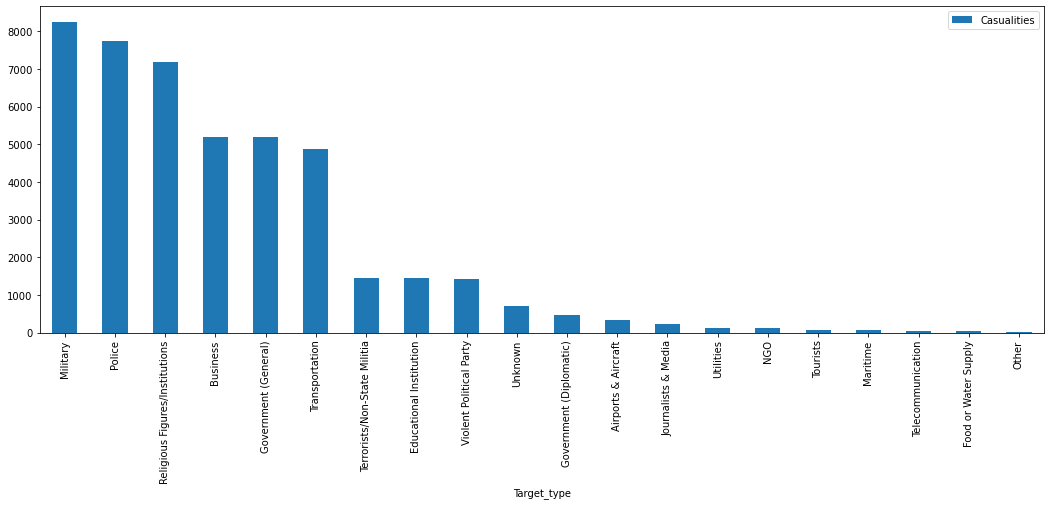

In [70]:
pakistan = terrorism[terrorism["Country"] == "Pakistan"]
pakistan = pakistan[pakistan["Target_type"] != "Private Citizens & Property"]
pakistan[["Target_type", "Casualities"]].groupby(pakistan["Target_type"]).sum().sort_values(by="Casualities", ascending=False)[:].astype(int).plot.bar()
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.xticks(rotation=90)
plt.show()

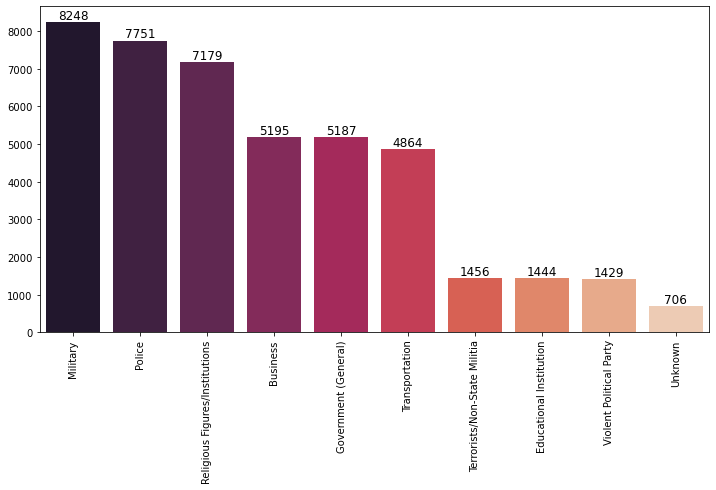

In [71]:
paki_tar_type = terrorism[terrorism["Country"] == "Pakistan"]
paki_tar_type = paki_tar_type[paki_tar_type["Target_type"] != "Private Citizens & Property"]
palette = sns.color_palette("rocket", n_colors=10)

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=paki_tar_type[["Target_type", "Casualities"]].groupby(terrorism["Target_type"]).sum().sort_values(by="Casualities", ascending=False)[:10].squeeze().index, 
            y=paki_tar_type[["Target_type", "Casualities"]].groupby(terrorism["Target_type"]).sum().sort_values(by="Casualities", ascending=False)[:10].squeeze().values, palette=palette, ax=ax)
ax.bar_label(ax.containers[-1], fmt="%.0f", label_type="edge", fontsize=12)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("")
plt.title('')
plt.show()

#### 전체 기간 동안 발생한 폭탄 테러 공격의 타입 별 발생 수: 파키스탄

* 아래의 차트는 폭발물을 이용한 테러 공격의 구체적인 형태가 나타내고 있습니다.

#### Tableau

* 파키스탄 국가 내 폭탄 테러 공격의 형태는 자살 폭탄 테러, 차량 폭탄 테러 등이 가장 빈도가 많습니다.

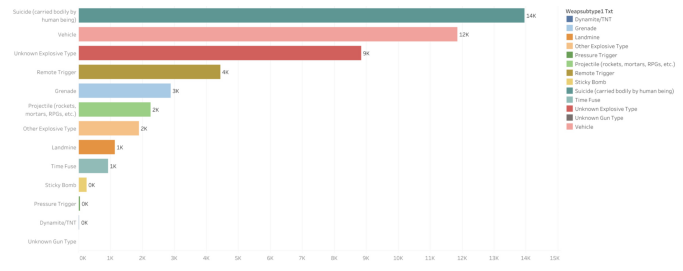

In [72]:
plt.figure(figsize=(12,6))
picture05 = plt.imread("./dataset/picture05.jpg")
plt.imshow(picture05)
plt.axis("Off")
plt.show()

#### 전체 기간 동안 발생한 테러 공격의 희생자 국적 별 사상자 수: 이라크 (외국 국적)

* 아래의 차트는 이라크 국가 내에서 테러로 인해 희생자의 외국인의 국적을 나타낸 차트입니다.

* 자국민을 제외한 이유는 테러 공격의 목표가 자국민이 아닌 다른 대상이라면 그 대상의 인근에 있던 자국민의 희생은 반드시 발생합니다.

* 그러므로 테러리스트의 테러 공격의 목표와 의도를 명확히 확인하기 위해 자국민을 제외하였습니다.

#### Python

* 테러 공격으로 인해 가장 많이 희생된 외국인의 국적은 미국, 이란, 국제 기구 소속, 그리고 이라크 전쟁의 참전국 영국이 있습니다.

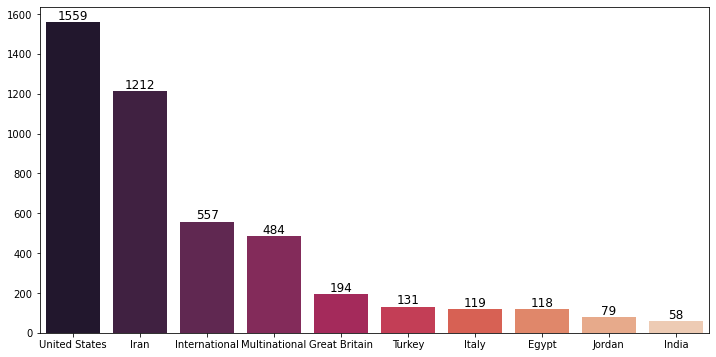

In [73]:
iraq = terrorism[terrorism["Country"] == "Iraq"]

palette = sns.color_palette("rocket", n_colors=10)

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=iraq[iraq["Nationality"] != "Iraq"][["Nationality", "Casualities"]].groupby(iraq['Nationality']).sum().sort_values(by="Casualities", ascending=False)[:10].squeeze().index, 
            y=iraq[iraq["Nationality"] != "Iraq"][["Nationality", "Casualities"]].groupby(iraq['Nationality']).sum().sort_values(by="Casualities", ascending=False)[:10].squeeze().values, 
            palette=palette, ax=ax)
ax.bar_label(ax.containers[-1], fmt="%.0f", label_type="edge", fontsize=12, )
plt.xlabel("")
plt.ylabel("")
plt.title('')
plt.show()

#### 전체 기간 동안 발생한 테러 공격의 희생자 국적 별 사상자 수: 파키스탄 (외국 국적)

* 아래의 차트는 파키스탄 국가 내에서 테러로 인해 희생자의 외국인의 국적을 나타낸 차트입니다.

* 자국민을 제외한 이유는 테러 공격의 목표가 자국민이 아닌 다른 대상이라면 그 대상의 인근에 있던 자국민의 희생은 반드시 발생합니다.

* 그러므로 테러리스트의 테러 공격의 목표와 의도를 명확히 확인하기 위해 자국민을 제외하였습니다.

#### Python

* 파키스탄은 아프가니스탄과 국경이 맞닿아 있습니다. 그러므로 아프가니스탄 전쟁으로 인해 아프가니스탄의 테러리스트가 파키스탄으로 이주했으리라고 생각했습니다.

* 테러 공격으로 인해 가장 많이 희생된 외국인의 국적은 아프가니스탄, 미국, 그리고 국제 기구 소속 등이 있습니다.

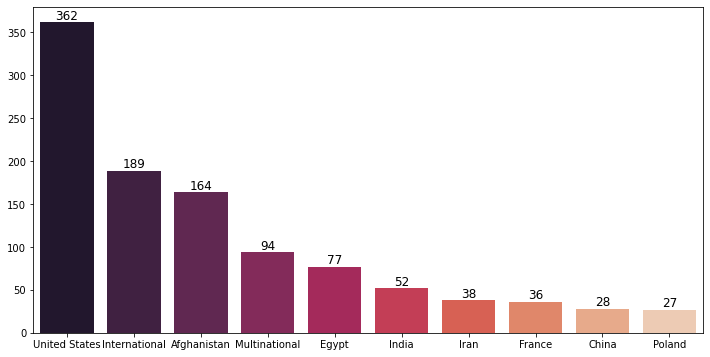

In [74]:
palette = sns.color_palette("rocket", n_colors=10)

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=pakistan[pakistan["Nationality"] != "Pakistan"][["Nationality", "Casualities"]].groupby(pakistan['Nationality']).sum().sort_values(by="Casualities", ascending=False)[:10].squeeze().index, 
            y=pakistan[pakistan["Nationality"] != "Pakistan"][["Nationality", "Casualities"]].groupby(pakistan['Nationality']).sum().sort_values(by="Casualities", ascending=False)[:10].squeeze().values, 
            palette=palette, ax=ax)
ax.bar_label(ax.containers[-1], fmt="%.0f", label_type="edge", fontsize=12, )
plt.xlabel("")
plt.ylabel("")
plt.title('')
plt.show()

#### 전체 기간 동안 발생한 테러 공격의 희생자 국적 별 사상자 수: 아프가니스탄 (외국 국적)

* 아래의 차트는 아프가니스탄 국가 내에서 테러로 인해 희생자의 외국인의 국적을 나타낸 차트입니다.

* 자국민을 제외한 이유는 테러 공격의 목표가 자국민이 아닌 다른 대상이라면 그 대상의 인근에 있던 자국민의 희생은 반드시 발생합니다.

* 그러므로 테러리스트의 테러 공격의 목표와 의도를 명확히 확인하기 위해 자국민을 제외하였습니다.

#### Python

* 테러 공격으로 인해 가장 많이 희생된 외국인의 국적은 국제 기구 소속, 미국 등이 있습니다.

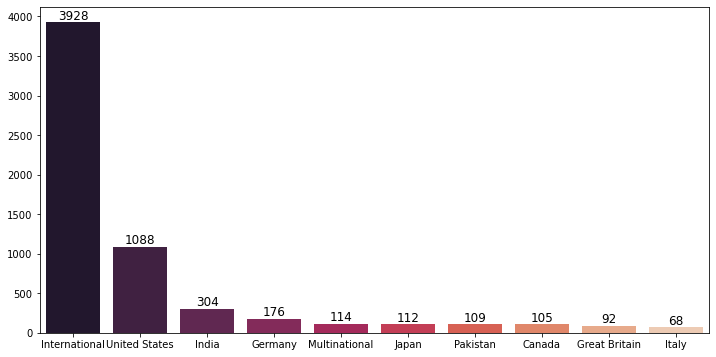

In [75]:
afghan = terrorism[terrorism["Country"] == "Afghanistan"]

palette = sns.color_palette("rocket", n_colors=10)

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=afghan[afghan["Nationality"] != "Afghanistan"][["Nationality", "Casualities"]].groupby(afghan['Nationality']).sum().sort_values(by="Casualities", ascending=False)[:10].squeeze().index, 
            y=afghan[afghan["Nationality"] != "Afghanistan"][["Nationality", "Casualities"]].groupby(afghan['Nationality']).sum().sort_values(by="Casualities", ascending=False)[:10].squeeze().values, 
            palette=palette, ax=ax)
ax.bar_label(ax.containers[-1], fmt="%.0f", label_type="edge", fontsize=12, )
plt.xlabel("")
plt.ylabel("")
plt.title('')
plt.show()

#### 전체 기간 동안 발생한 테러 공격으로 희생된 희생자의 국적 별 사상자 수: 이라크 자국민 제외, 이라크 자국민 포함

* 아래의 차트는 전체 기간 동안 발생한 테러 공격으로 희생된 희생자의 국적 별 사상자 수를 나타낸 차트입니다.

* 자국민을 제외하였던 것은 테러리스트의 테러 공격 목표, 그리고 의도를 파악하기 위함이었습니다.

* 다음으로는 테러 공격의 목표, 그리고 의도가 어떻게 되었든 간에 자국의 희생자가 다수 발생하고, 그 심각성을 표현해 보았습니다.

* 첫 번째로 나타난 차트를 확인하시고, 다음으로 오는 차트에서 첫 번째 차트에 있던 국가를 찾아보세요.

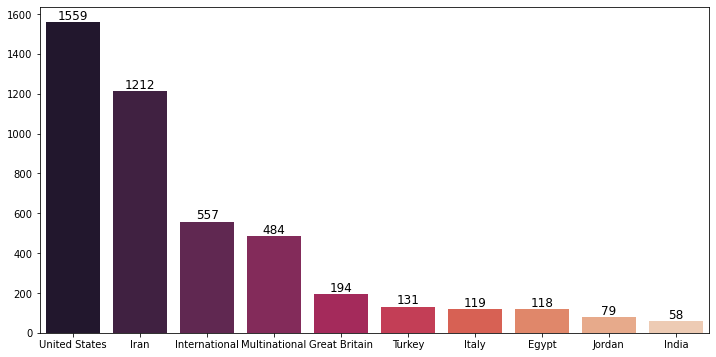

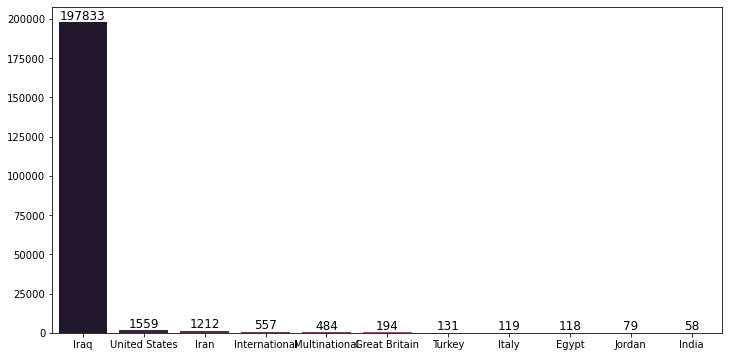

In [76]:
iraq = terrorism[terrorism["Country"] == "Iraq"]

palette = sns.color_palette("rocket", n_colors=10)

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=iraq[iraq["Nationality"] != "Iraq"][["Nationality", "Casualities"]].groupby(iraq['Nationality']).sum().sort_values(by="Casualities", ascending=False)[:10].squeeze().index, 
            y=iraq[iraq["Nationality"] != "Iraq"][["Nationality", "Casualities"]].groupby(iraq['Nationality']).sum().sort_values(by="Casualities", ascending=False)[:10].squeeze().values, 
            palette=palette, ax=ax)
ax.bar_label(ax.containers[-1], fmt="%.0f", label_type="edge", fontsize=12, )
plt.xlabel("")
plt.ylabel("")
plt.title('')
plt.show()

palette = sns.color_palette("rocket", n_colors=10)

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=iraq[["Nationality", "Casualities"]].groupby(iraq['Nationality']).sum().sort_values(by="Casualities", ascending=False)[:11].squeeze().index, 
            y=iraq[["Nationality", "Casualities"]].groupby(iraq['Nationality']).sum().sort_values(by="Casualities", ascending=False)[:11].squeeze().values, 
            palette=palette, ax=ax)
ax.bar_label(ax.containers[-1], fmt="%.0f", label_type="edge", fontsize=12, )
plt.xlabel("")
plt.ylabel("")
plt.title('')
plt.show()

#### 전체 기간 동안 발생한 테러 공격으로 희생된 희생자의 국적 별 사상자 수: 파키스탄 자국민 제외, 파키스탄 자국민 포함

* 아래의 차트는 전체 기간 동안 발생한 테러 공격으로 희생된 희생자의 국적 별 사상자 수를 나타낸 차트입니다.

* 자국민을 제외하였던 것은 테러리스트의 테러 공격 목표, 그리고 의도를 파악하기 위함이었습니다.

* 다음으로는 테러 공격의 목표, 그리고 의도가 어떻게 되었든 간에 자국의 희생자가 다수 발생하고, 그 심각성을 표현해 보았습니다.

* 첫 번째로 나타난 차트를 확인하시고, 다음으로 오는 차트에서 첫 번째 차트에 있던 국가를 찾아보세요.

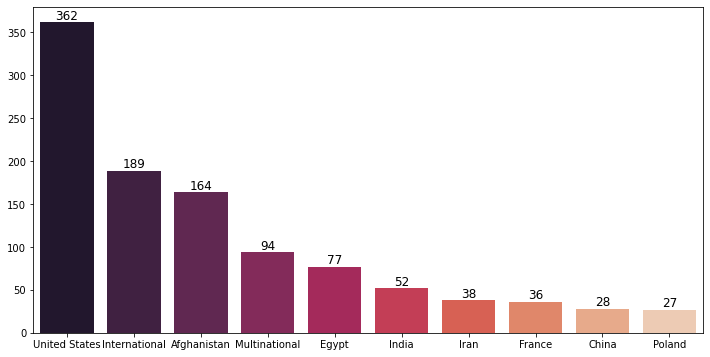

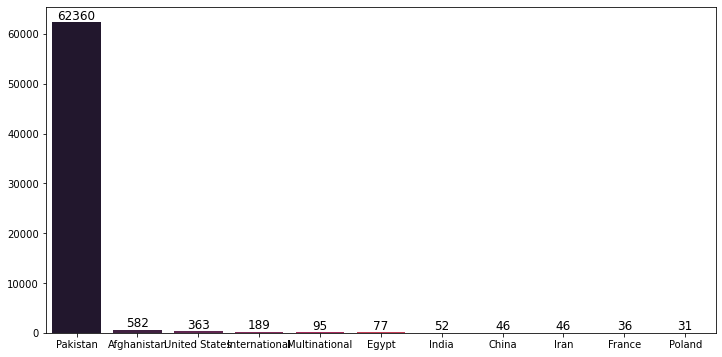

In [77]:
palette = sns.color_palette("rocket", n_colors=10)

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=pakistan[pakistan["Nationality"] != "Pakistan"][["Nationality", "Casualities"]].groupby(pakistan['Nationality']).sum().sort_values(by="Casualities", ascending=False)[:10].squeeze().index, 
            y=pakistan[pakistan["Nationality"] != "Pakistan"][["Nationality", "Casualities"]].groupby(pakistan['Nationality']).sum().sort_values(by="Casualities", ascending=False)[:10].squeeze().values, 
            palette=palette, ax=ax)
ax.bar_label(ax.containers[-1], fmt="%.0f", label_type="edge", fontsize=12, )
plt.xlabel("")
plt.ylabel("")
plt.title('')
plt.show()

palette = sns.color_palette("rocket", n_colors=10)
pakistan = terrorism[terrorism["Country"] == "Pakistan"]
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=pakistan[["Nationality", "Casualities"]].groupby(pakistan['Nationality']).sum().sort_values(by="Casualities", ascending=False)[:11].squeeze().index, 
            y=pakistan[["Nationality", "Casualities"]].groupby(pakistan['Nationality']).sum().sort_values(by="Casualities", ascending=False)[:11].squeeze().values, 
            palette=palette, ax=ax)
ax.bar_label(ax.containers[-1], fmt="%.0f", label_type="edge", fontsize=12, )
plt.xlabel("")
plt.ylabel("")
plt.title('')
plt.show()

#### 전체 기간 동안 발생한 테러 공격으로 희생된 희생자의 국적 별 사상자 수: 아프가니스탄 자국민 제외, 아프가니스탄 자국민 포함

* 아래의 차트는 전체 기간 동안 발생한 테러 공격으로 희생된 희생자의 국적 별 사상자 수를 나타낸 차트입니다.

* 자국민을 제외하였던 것은 테러리스트의 테러 공격 목표, 그리고 의도를 파악하기 위함이었습니다.

* 다음으로는 테러 공격의 목표, 그리고 의도가 어떻게 되었든 간에 자국의 희생자가 다수 발생하고, 그 심각성을 표현해 보았습니다.

* 첫 번째로 나타난 차트를 확인하시고, 다음으로 오는 차트에서 첫 번째 차트에 있던 국가를 찾아보세요.

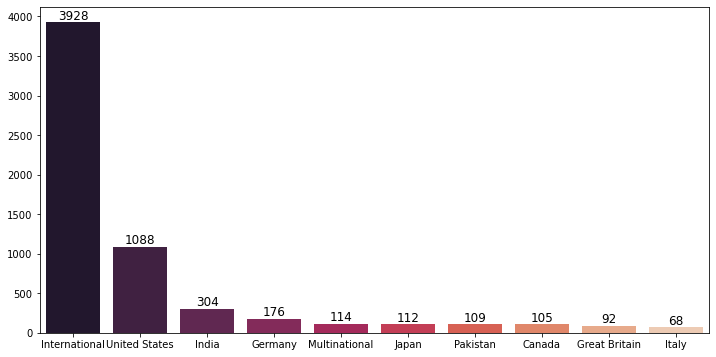

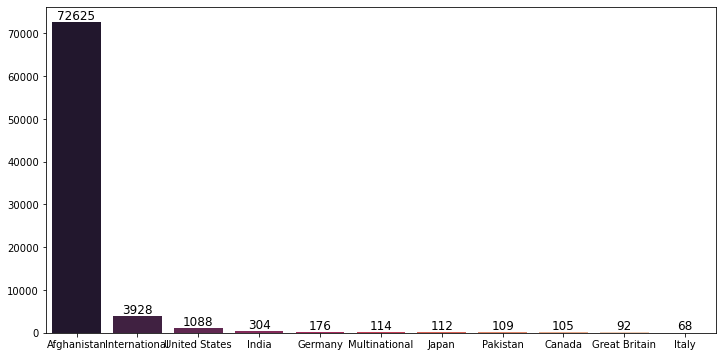

In [78]:
afghan = terrorism[terrorism["Country"] == "Afghanistan"]

palette = sns.color_palette("rocket", n_colors=10)

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=afghan[afghan["Nationality"] != "Afghanistan"][["Nationality", "Casualities"]].groupby(afghan['Nationality']).sum().sort_values(by="Casualities", ascending=False)[:10].squeeze().index, 
            y=afghan[afghan["Nationality"] != "Afghanistan"][["Nationality", "Casualities"]].groupby(afghan['Nationality']).sum().sort_values(by="Casualities", ascending=False)[:10].squeeze().values, 
            palette=palette, ax=ax)
ax.bar_label(ax.containers[-1], fmt="%.0f", label_type="edge", fontsize=12, )
plt.xlabel("")
plt.ylabel("")
plt.title('')
plt.show()

palette = sns.color_palette("rocket", n_colors=10)

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=afghan[["Nationality", "Casualities"]].groupby(afghan['Nationality']).sum().sort_values(by="Casualities", ascending=False)[:11].squeeze().index, 
            y=afghan[["Nationality", "Casualities"]].groupby(afghan['Nationality']).sum().sort_values(by="Casualities", ascending=False)[:11].squeeze().values, 
            palette=palette, ax=ax)
ax.bar_label(ax.containers[-1], fmt="%.0f", label_type="edge", fontsize=12, )
plt.xlabel("")
plt.ylabel("")
plt.title('')
plt.show()

#### 전체 기간 동안 발생한 테러 공격으로 희생된 희생자의 타입 별 사상자 수 - 이라크: 민간인 제외, 민간인 포함

* 아래의 차트는 전체 기간 동안 발생한 테러 공격으로 희생된 희생자의 타입 별 사상자 수를 나타낸 차트입니다.

* 민간인을 제외하였던 것은 테러리스트의 테러 공격 목표, 그리고 의도를 파악하기 위함이었습니다.

* 다음으로는 테러 공격의 목표, 그리고 의도가 어떻게 되었든 간에 희생자가 다수 발생하고, 그 심각성을 표현해 보았습니다.

* 첫 번째로 나타난 차트를 확인하시고, 다음으로 오는 차트에서 첫 번째 차트에 있던 국가를 찾아보세요.

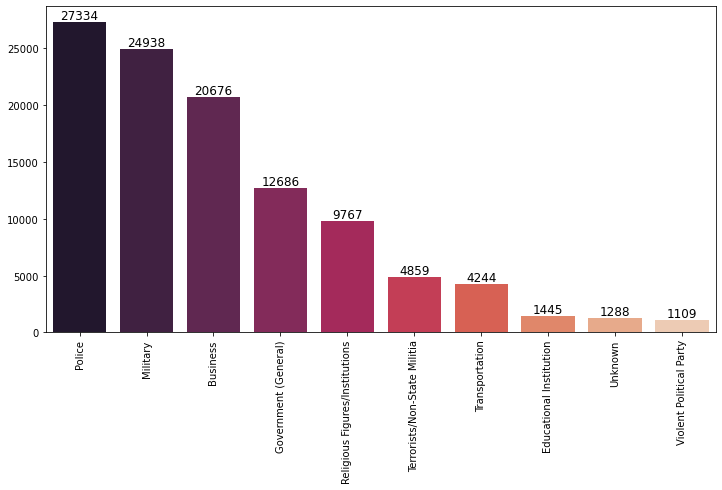

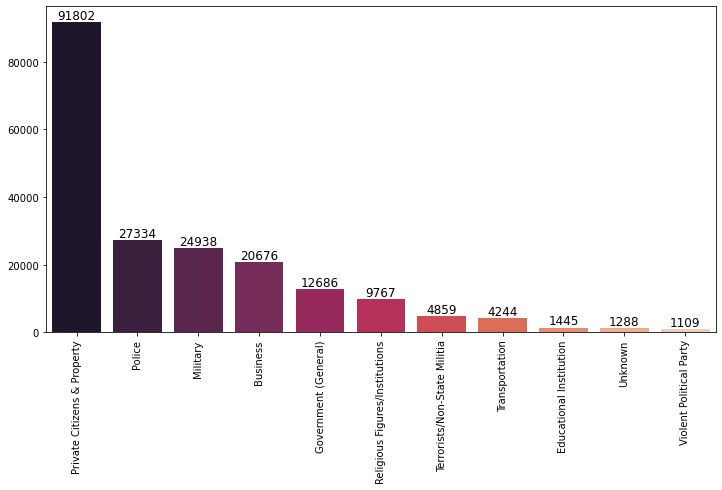

In [79]:
iraq_tar_type = terrorism[terrorism["Country"] == "Iraq"]
iraq_tar_type = iraq_tar_type[iraq_tar_type["Target_type"] != "Private Citizens & Property"]
palette = sns.color_palette("rocket", n_colors=10)

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=iraq_tar_type[["Target_type", "Casualities"]].groupby(iraq_tar_type["Target_type"]).sum().sort_values(by="Casualities", ascending=False)[:10].squeeze().index, 
            y=iraq_tar_type[["Target_type", "Casualities"]].groupby(iraq_tar_type["Target_type"]).sum().sort_values(by="Casualities", ascending=False)[:10].squeeze().values, 
            palette=palette, ax=ax)
ax.bar_label(ax.containers[-1], fmt="%.0f", label_type="edge", fontsize=12)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("")
plt.title('')
plt.show()

iraq_tar_type = terrorism[terrorism["Country"] == "Iraq"]
palette = sns.color_palette("rocket", n_colors=11)
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=iraq_tar_type[["Target_type", "Casualities"]].groupby(iraq_tar_type["Target_type"]).sum().sort_values(by="Casualities", ascending=False)[:11].squeeze().index, 
            y=iraq_tar_type[["Target_type", "Casualities"]].groupby(iraq_tar_type["Target_type"]).sum().sort_values(by="Casualities", ascending=False)[:11].squeeze().values, 
            palette=palette, ax=ax)
ax.bar_label(ax.containers[-1], fmt="%.0f", label_type="edge", fontsize=12)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("")
plt.title('')
plt.show()

#### 전체 기간 동안 발생한 테러 공격으로 희생된 희생자의 타입 별 사상자 수 - 파키스탄: 민간인 제외, 민간인 포함

* 아래의 차트는 전체 기간 동안 발생한 테러 공격으로 희생된 희생자의 타입 별 사상자 수를 나타낸 차트입니다.

* 민간인을 제외하였던 것은 테러리스트의 테러 공격 목표, 그리고 의도를 파악하기 위함이었습니다.

* 다음으로는 테러 공격의 목표, 그리고 의도가 어떻게 되었든 간에 희생자가 다수 발생하고, 그 심각성을 표현해 보았습니다.

* 첫 번째로 나타난 차트를 확인하시고, 다음으로 오는 차트에서 첫 번째 차트에 있던 국가를 찾아보세요.

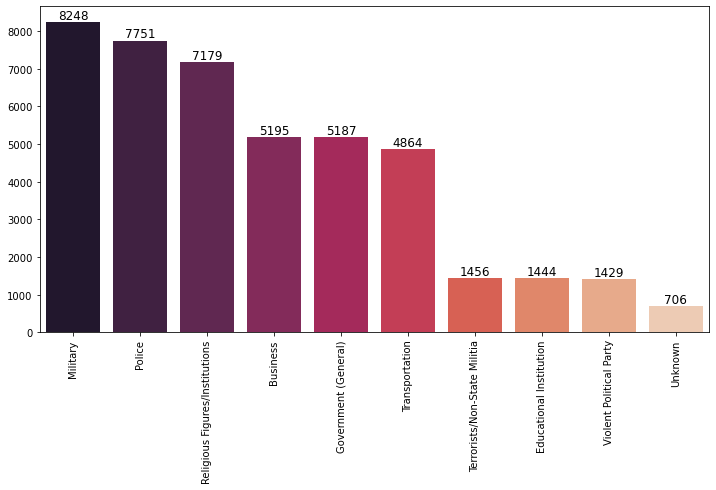

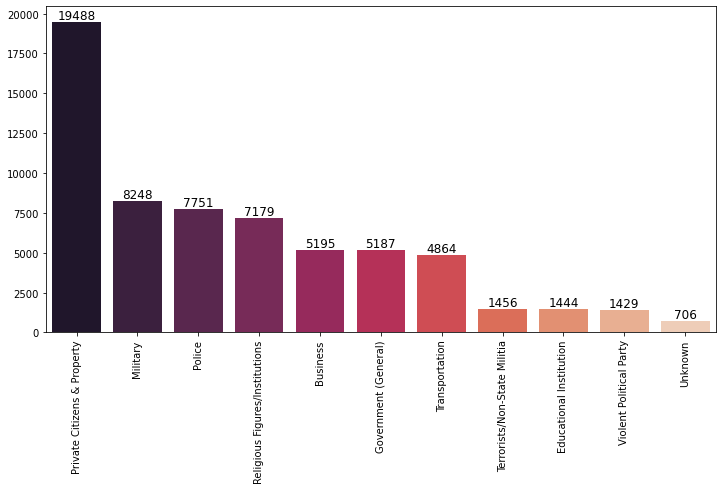

In [80]:
paki_tar_type = terrorism[terrorism["Country"] == "Pakistan"]
paki_tar_type = paki_tar_type[paki_tar_type["Target_type"] != "Private Citizens & Property"]
palette = sns.color_palette("rocket", n_colors=10)

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=paki_tar_type[["Target_type", "Casualities"]].groupby(paki_tar_type["Target_type"]).sum().sort_values(by="Casualities", ascending=False)[:10].squeeze().index, 
            y=paki_tar_type[["Target_type", "Casualities"]].groupby(paki_tar_type["Target_type"]).sum().sort_values(by="Casualities", ascending=False)[:10].squeeze().values, 
            palette=palette, ax=ax)
ax.bar_label(ax.containers[-1], fmt="%.0f", label_type="edge", fontsize=12)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("")
plt.title('')
plt.show()

paki_tar_type = terrorism[terrorism["Country"] == "Pakistan"]
palette = sns.color_palette("rocket", n_colors=11)

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=paki_tar_type[["Target_type", "Casualities"]].groupby(paki_tar_type["Target_type"]).sum().sort_values(by="Casualities", ascending=False)[:11].squeeze().index, 
            y=paki_tar_type[["Target_type", "Casualities"]].groupby(paki_tar_type["Target_type"]).sum().sort_values(by="Casualities", ascending=False)[:11].squeeze().values, 
            palette=palette, ax=ax)
ax.bar_label(ax.containers[-1], fmt="%.0f", label_type="edge", fontsize=12)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("")
plt.title('')
plt.show()

#### 전체 기간 동안 발생한 테러 공격으로 희생된 희생자의 타입 별 사상자 수 - 아프가니스탄: 민간인 제외, 민간인 포함

* 아래의 차트는 전체 기간 동안 발생한 테러 공격으로 희생된 희생자의 타입 별 사상자 수를 나타낸 차트입니다.

* 민간인을 제외하였던 것은 테러리스트의 테러 공격 목표, 그리고 의도를 파악하기 위함이었습니다.

* 다음으로는 테러 공격의 목표, 그리고 의도가 어떻게 되었든 간에 희생자가 다수 발생하고, 그 심각성을 표현해 보았습니다.

* 첫 번째로 나타난 차트를 확인하시고, 다음으로 오는 차트에서 첫 번째 차트에 있던 국가를 찾아보세요.

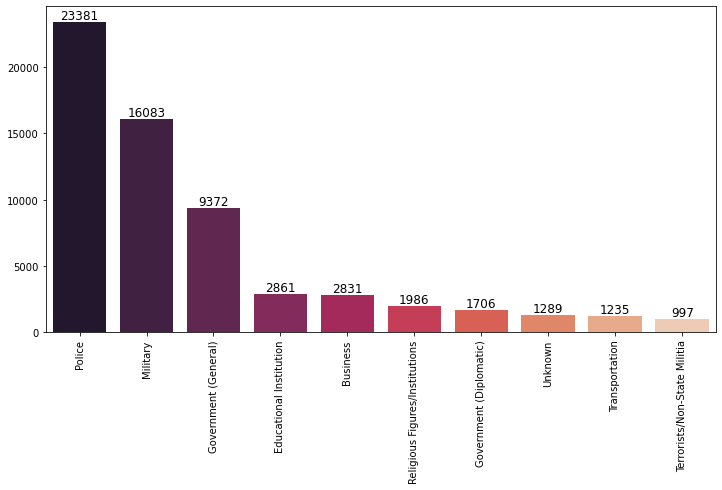

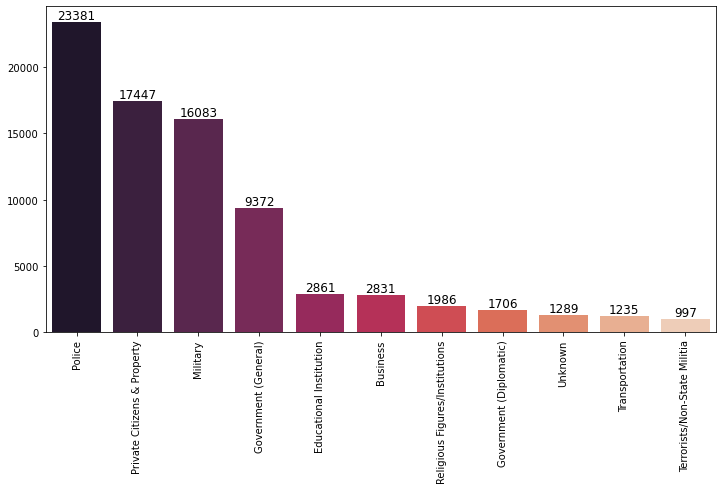

In [81]:
afghan_tar_type = terrorism[terrorism["Country"] == "Afghanistan"]
afghan_tar_type = afghan_tar_type[afghan_tar_type["Target_type"] != "Private Citizens & Property"]

palette = sns.color_palette("rocket", n_colors=10)

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=afghan_tar_type[["Target_type", "Casualities"]].groupby(afghan_tar_type["Target_type"]).sum().sort_values(by="Casualities", ascending=False)[:10].squeeze().index, 
            y=afghan_tar_type[["Target_type", "Casualities"]].groupby(afghan_tar_type["Target_type"]).sum().sort_values(by="Casualities", ascending=False)[:10].squeeze().values, 
            palette=palette, ax=ax)
ax.bar_label(ax.containers[-1], fmt="%.0f", label_type="edge", fontsize=12)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("")
plt.title('')
plt.show()

afghan_tar_type = terrorism[terrorism["Country"] == "Afghanistan"]
palette = sns.color_palette("rocket", n_colors=11)
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=afghan_tar_type[["Target_type", "Casualities"]].groupby(afghan_tar_type["Target_type"]).sum().sort_values(by="Casualities", ascending=False)[:11].squeeze().index, 
            y=afghan_tar_type[["Target_type", "Casualities"]].groupby(afghan_tar_type["Target_type"]).sum().sort_values(by="Casualities", ascending=False)[:11].squeeze().values, 
            palette=palette, ax=ax)
ax.bar_label(ax.containers[-1], fmt="%.0f", label_type="edge", fontsize=12)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("")
plt.title('')
plt.show()

## 결론

- 미국이 테러와의 전쟁을 선포한 이래, 즉 중동 전쟁이 시작함과 동시에 테러가 비교적 발생하지 않았던 중동 지역에서 테러가 급격하게 증가하였습니다.

- 이라크, 아프가니스탄은 전쟁으로 인해 테러리스트를 포함한 자국의 민간인, 그리고 테러리스트와 전투를 한 미국, 영국, 그리고 국제 기구 소속의 군인들이 다수 희생되었습니다.

- 파키스탄은 테러와의 전쟁으로 인해 간접적인 영향을 받았습니다. 그 밖에도 파키스탄은 인도와의 종교 분쟁으로 인한 테러 공격, 그리고 테러 공격의 희생자가 다수 발생하였습니다.

- 따라서, 테러가 급격하게 증가하는 시점은 '2004년'으로 채택하였고, '2004년'을 기준으로 나눈 데이터 등을 살펴보았을 때, 어느 정도 채택 가능하다고 생각했습니다.

- 그리고 테러가 급격하게 증가하게 된 원인은 '테러와의 전쟁'으로 채택하였고, 미국이 '테러와의 전쟁'을 선포한 이래 테러 공격이 비교적 발생하지 않았던 중동, 아시아 등에서 테러가 급격하게 증가하였습니다.

- 테러 공격에 희생된 희생자의 국적도 미국, 영국, 그리고 국제 기구에 소속된 인원이 많았고, 테러 공격으로 희생된 희생자 역시 군인, 경찰 등이 가장 많았으므로 테러리스트의 의도를 어느 정도 파악할 수 있었습니다.